In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [73]:
df = pd.read_csv("train.csv") 
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [75]:
df.nunique()

number_of_elements           9
mean_atomic_mass          3365
wtd_mean_atomic_mass     15164
gmean_atomic_mass         3365
wtd_gmean_atomic_mass    15165
                         ...  
range_Valence                7
wtd_range_Valence         5908
std_Valence                125
wtd_std_Valence           7082
critical_temp             3007
Length: 82, dtype: int64

In [76]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [77]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

<AxesSubplot:>

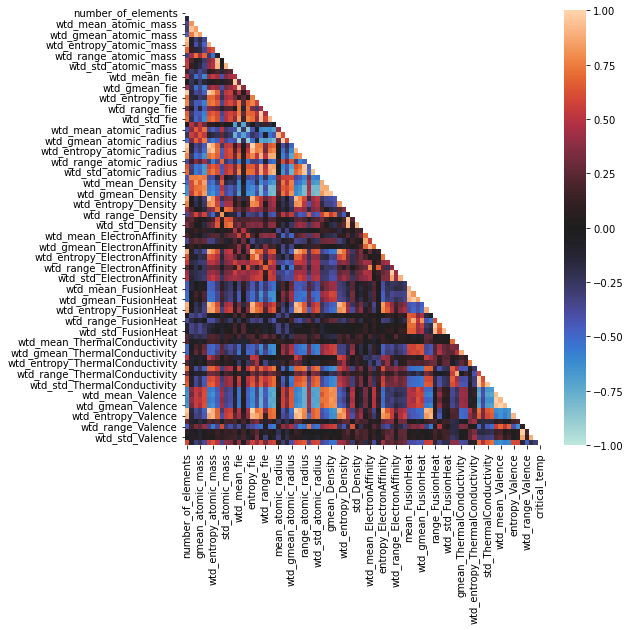

In [78]:
plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

<AxesSubplot:>

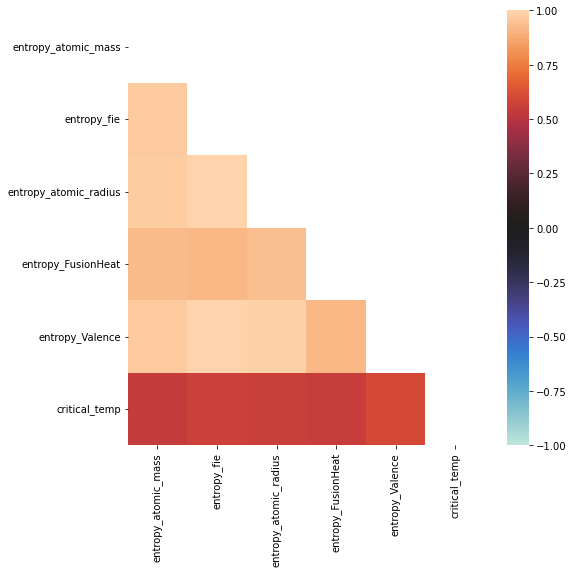

In [79]:
selected_features = ['entropy_atomic_mass', 'entropy_fie', 'entropy_atomic_radius', 
                     'entropy_FusionHeat', 'entropy_Valence', 'critical_temp']
df_ = df[selected_features]

plt.figure(figsize=(8,8))

corr = df_.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

In [80]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [81]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
class PCA:
    def __init__(self,X):
        self.X=X

    def cum_explained_variance(X):

        num_components = X.shape[1]

        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
        
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        explained_variance_ratio = [i/np.sum(eigen_values) for i in sorted_eigenvalue[:num_components]]
        cum_explained_variance = np.cumsum(explained_variance_ratio)
        return cum_explained_variance


    def fit(X,num_components):
 
        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        
        eigenvector_subset = sorted_eigenvectors[:,0:num_components]
        X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
        principalDf = pd.DataFrame(data = X_reduced)
        principalDf.columns = ['PC{}'.format(i) for i in range (1, len(principalDf.columns)+1)]
        
        return principalDf

In [83]:
cum_explained_variance = PCA.cum_explained_variance(X)
cum_explained_variance

array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803, 0.9204725 , 0.93045804, 0.9402828 ,
       0.94809799, 0.95528592, 0.96072059, 0.96555386, 0.96937062,
       0.97239336, 0.97525888, 0.97782371, 0.97989482, 0.981867  ,
       0.98372988, 0.98543026, 0.98685619, 0.98811913, 0.98927039,
       0.99029449, 0.99125491, 0.99217417, 0.99289294, 0.99357786,
       0.99419877, 0.99476954, 0.99526251, 0.99569935, 0.99612203,
       0.99644816, 0.99675418, 0.99701116, 0.99724859, 0.99747212,
       0.99768749, 0.997884  , 0.99807157, 0.99825233, 0.99842756,
       0.99858394, 0.99873775, 0.99886446, 0.99898456, 0.99910242,
       0.99920788, 0.99929714, 0.99937851, 0.99945842, 0.99953023,
       0.999595  , 0.9996519 , 0.99969627, 0.99974023, 0.99977965,
       0.99981497, 0.99984716, 0.99987529, 0.9998981 , 0.99991868,
       0.99993681, 0.99995349, 0.99996825, 0.99997748, 0.99998

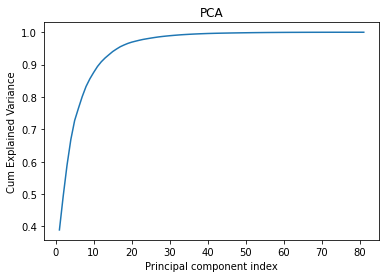

In [84]:
plt.plot(list(range(1,X.shape[1]+1)),cum_explained_variance)
plt.title('PCA')
plt.xlabel('Principal component index')
plt.ylabel('Cum Explained Variance')
plt.show()

In [85]:
X = PCA.fit(X,15)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,3.664487,-0.991643,3.045260,-1.713725,-0.246057,0.203213,0.450996,-0.220078,-0.384088,-0.220391,-0.632356,0.150977,0.521104,0.018955,-0.250727
1,4.555468,0.214585,1.722873,-1.111493,-0.981005,1.011501,-0.245300,0.214118,0.408239,1.139334,-1.057394,0.565372,0.605459,0.010472,-0.825366
2,3.488176,-1.055167,3.130821,-1.811590,-0.296335,0.211822,0.485278,0.010470,-0.496751,-0.180617,-0.737590,0.143143,0.565999,0.019710,-0.277222
3,3.581284,-1.020144,3.084663,-1.760859,-0.270516,0.208458,0.466648,-0.108675,-0.439150,-0.199967,-0.684029,0.147397,0.542793,0.019172,-0.263621
4,3.809671,-0.948297,2.981358,-1.627398,-0.199680,0.188464,0.426050,-0.426505,-0.279207,-0.263086,-0.533304,0.156691,0.481157,0.019274,-0.226952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-2.350607,0.387111,-1.449530,2.426772,-2.911041,1.754652,0.114288,-1.041992,-0.186578,-1.235675,1.220777,-0.381472,1.449390,0.293490,1.400358
21259,5.446209,0.780202,1.336464,0.290010,-1.142610,-0.236224,0.988120,-0.775729,0.324684,0.793209,1.033398,-0.073589,1.077442,0.188025,0.071977
21260,-10.477462,0.931943,1.572640,0.372598,0.214181,1.304829,-0.814939,0.052747,-0.720376,0.347597,-0.003665,-0.939783,-0.558038,0.903606,-0.272152
21261,-9.771885,1.001345,1.215602,0.872021,0.954733,0.674221,-0.754652,-1.624888,0.146395,0.065916,0.227885,-0.586942,-0.764900,1.059363,-0.479104


Creating Classes of All Regression Types

In [86]:
class LinearRegression1:
    def __init__(self,X,y,learningRate,Tolerance,maxiteration,reg=False, gd=False, L2= False) -> None:
        self.X=X
        self.y=y
        self.learnRate=learningRate
        self.Tolerance=Tolerance
        self.maxiteration=maxiteration
        self.gd = gd
        self.L2 = L2
        self.reg = reg


    def addx0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def normalized(self,X):
        X_norm=self.addx0(X)
        return X_norm

    def closeFormSolution(self,X,y):
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)      
        return w

    def closeFormSolutionL2(self,X,y):
        N = X.shape[1]
        I = np.identity(N)
        w =  np.linalg.inv(X.T.dot(X)+self.reg*I).dot(X.T).dot(y)
        return w     

        
    def gradientDescent(self,X,y):
        
        error=[]
        lasterror=float("inf")
        
        for t in tqdm(range(self.maxiteration)):
            self.w = self.w - self.learnRate*self.costderiviation(X,y)
            cur = self.RMSE(X,y)
            diff = lasterror - cur
            lasterror = cur
            
            error.append(cur)
            
            if diff<self.Tolerance:
                print("The model stopped - no further improvemnt")
                break
       
        self.plot_cost(error)
        print("SSE = ",self.sse(X,y))
        print("RMSE = ",self.RMSE(X,y))
        print("Diff = ", diff )

    def gradientDescentL2(self,X,y):
        
        error=[]
        lasterror=float("inf")
        for t in tqdm(range(self.maxiteration)):
            self.w = self.w - self.learnRate*self.costderiviationL2(X,y)
            
            cur = self.RMSE(X,y)
            diff = lasterror - cur
            lasterror = cur
            
            error.append(cur)
            
            if diff<self.Tolerance:
                print("The model stopped - no further improvemnt")
                break

        self.plot_cost(error) 
        print("SSE = ",self.sse(X,y))
        print("RMSE = ",self.RMSE(X,y)) 
        print("Diff = ", diff)        


    def predict(self,X):
        return X.dot(self.w)
    
    def sse(self,X,y):
        y_hat=self.predict(X)
        sse = ((y_hat-y)**2).sum()
        return sse

    
    def RMSE(self,X,y):
        N = X.shape[0]
        sse = self.sse(X,y)
        RMSE = np.sqrt(sse/N)
        return RMSE

    
    def costfunction(self,X,y):
        return self.sse(X,y)/(2)

    def costderiviation(self,X,y):
        y_hat= self.predict(X)
        return(y_hat - y).dot(X)

    def costderiviationL2(self, X,y):
        f = self.costderiviation(X,y)
        f += (self.reg)*self.w
        return f        
       
    
    def fit(self):

        self.X = self.normalized(self.X)
   
        if  not self.gd and not self.L2:
            print("solving using norml equation - closed form solution")
            self.w = self.closeFormSolution(self.X,self.y)
                  
        if  self.gd and not self.L2:
            print("solving using gardient descent")
            self.w = np.ones(self.X.shape[1],dtype=np.float64)*0
            self.gradientDescent(self.X,self.y)         

        if  self.gd and self.L2:
            print("solving using gardient descent with L2")
            self.w = np.ones(self.X.shape[1],dtype=np.float64)*0
            self.gradientDescentL2(self.X,self.y)            

        if not self.gd and self.L2:
            print("solving using norml equation L2 - closed form solution")
            self.w = self.closeFormSolutionL2(self.X,self.y)

        return self.w
        
        
    def plot_cost(self,error):
        # Data for plotting
        s = np.array(error)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()



In [87]:
class decision_tree_regressor:
    
    def __init__(self, max_depth = None, mode=None, n_features=None, criteria='std', seed=None):
        self.tree = self.tree_split()
        self.data_cols = None
        self.max_depth = max_depth
        self.current_depth = 0
        self.criteria = criteria
        self.mode = mode
        self.n_features = n_features
        if seed:
            self._seed = seed
            np.random.seed = seed
    
    # Sub class for handling recursive nodes (only makes sense in the scope of a tree)
    class tree_split:
        def __init__(self,col=-1,value=None,results=None,label=None,tb=None,fb=None, filt=None):
            self.col=col # column index of criteria being tested
            self.value=value # vlaue necessary to get a true result
            self.results=results # dict of results for a branch, None for everything except endpoints
            self.tb=tb # true decision nodes 
            self.fb=fb # false decision nodes
            self.filt=filt # column filter to see which columns were available
    
    def get_mean_target_value(self, data):
        return np.mean(data)
    
    def split_data(self, X, y, colnum, value):
        splitter = None
        if isinstance(value, int) or isinstance(value,float):
            splitter = lambda x: x[colnum] >= value
        else:
            splitter = lambda x: x[colnum] == value
        split1 = [i for i,row in enumerate(X) if splitter(row)]
        split2 = [i for i,row in enumerate(X) if not splitter(row)]
        set1X = X[split1]
        set1Y = y[split1]
        set2X = X[split2]
        set2Y = y[split2]
        return set1X, set1Y, set2X, set2Y

    def split_criteria(self, y):
        if self.criteria == 'mae':
            mu = np.mean(y)
            return np.mean(np.abs(y-mu))
        else:
            return np.std(y) 
        
    def find_number_of_columns(self, X):
        if isinstance(self.n_features, int):
            return self.n_features
        if self.n_features == 'sqrt':
            return int(np.sqrt(X.shape[1])+0.5)
        if self.n_features == 'div3':
            return int(X.shape[1]/3+0.5)
        else:
            raise ValueError("Invalid n_features selection")
    
    def randomize_columns(self,X):
        num_col = self.find_number_of_columns(X)
        filt = np.random.choice(np.arange(0,X.shape[1]),num_col,replace=False)
        filtered_X = self.apply_filter(X, filt)
        return filtered_X, filt
    
    def apply_filter(self, X, filt):
        """
        Given X and a filter, only the columns matching the index values
        in filter are returned.
        ---
        Input: X (array), filter (array of column IDs)
        Output: filtered_X (array)
        """
        filtered_X = X.T[filt]
        return filtered_X.T
    
    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x
    
    def fit(self, X, y):
        self.tree = self._fit(X,y)
    
    def _fit(self, X, y, depth=0):
        X = self.convert_to_array(X)
        y = self.pandas_to_numpy(y)

        if len(X) == 0: return tree_split()
        current_score = self.split_criteria(y)

        best_gain = 0.0
        best_criteria = None
        best_sets = None
        
        self.data_cols = X.shape[1]
        
        if self.mode=='rfnode':
            _, cols = self.randomize_columns(X)
        else: 
            cols = [x for x in range(self.data_cols)]        
        
        for col in cols:
            column_values = set(X.T[col])
            for value in column_values:
                set1, set1_y, set2, set2_y = self.split_data(X, y, col, value)
                p = float(len(set1)) / len(y)
                gain = current_score - p*self.split_criteria(set1_y) - (1-p)*self.split_criteria(set2_y)
                if gain > best_gain and len(set1_y) and len(set2_y):
                    best_gain = gain
                    best_criteria = (col, value)
                    best_sets = (np.array(set1), np.array(set1_y), np.array(set2), np.array(set2_y))
        
        if (self.max_depth and depth < self.max_depth) or not self.max_depth:
            if best_gain > 0:
                self.current_depth += 1
                true_branch = self._fit(best_sets[0], best_sets[1], depth=depth+1)
                false_branch = self._fit(best_sets[2], best_sets[3], depth=depth+1)
                return self.tree_split(col=best_criteria[0], value=best_criteria[1],
                        tb=true_branch, fb=false_branch, filt=cols)
            else:
                return self.tree_split(results=self.get_mean_target_value(y))
        else:
            return self.tree_split(results=self.get_mean_target_value(y))

    def print_tree(self, indent="---"):
        self.__original_indent = indent
        self._print_tree_(self.tree, indent)
    
    def _print_tree_(self, tree, indent):
        if tree.results: # if this is a end node
            print(str(tree.results))
        else:
            print('Column ' + str(tree.col)+' : '+str(tree.value)+'? ')
            # Print the branches
            print(indent+' True: ', end=' ')
            next_indent = indent+self.__original_indent
            self._print_tree_(tree.tb,indent=next_indent)
            print(indent+' False: ', end=' ')
            self._print_tree_(tree.fb,indent=next_indent)

    def predict(self, newdata):
        results = []
        newdata = self.convert_to_array(newdata)
        for x in newdata:
            results.append(self._predict(x,self.tree))
        return np.array(results)
            
    def _predict(self, newdata, tree):
        if tree.results is not None: # if this is a end node
            return tree.results

        if isinstance(newdata[tree.col], int) or isinstance(newdata[tree.col],float):
            if newdata[tree.col] >= tree.value:
                return self._predict(newdata, tree.tb)

            else:
                return self._predict(newdata, tree.fb)
        else:
            if newdata[tree.col] == tree.value:
                return self._predict(newdata, tree.tb)
            else:
                return self._predict(newdata, tree.fb) 

    def score(self, X, y):
        X = self.pandas_to_numpy(X)
        y = self.pandas_to_numpy(y)
        pred = self.predict(X)
        return -1.*np.mean((pred-y)**2)


In [88]:
class random_forest_regressor:
    
    def __init__(self, n_trees = 10, max_depth=None, n_features='sqrt', mode='rfnode', seed=None, criteria='std'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.n_features = n_features
        self.tree_filter_pairs = []
        self.mode = mode
        self.criteria = criteria
        if seed:
            self._seed = seed
            np.random.seed(seed)
        
    def find_number_of_columns(self, X):
        if isinstance(self.n_features, int):
            return self.n_features
        if self.n_features == 'sqrt':
            return int(np.sqrt(X.shape[1])+0.5)
        if self.n_features == 'div3':
            return int(X.shape[1]/3+0.5)
        else:
            raise ValueError("Invalid n_features selection")
    
    def get_bagged_data(self, X, y):
        index = np.random.choice(np.arange(len(X)),len(X))
        return X[index], y[index]
    
    def randomize_columns(self,X):
        num_col = self.find_number_of_columns(X)
        filt = np.random.choice(np.arange(0,X.shape[1]),num_col,replace=False)
        filtered_X = self.apply_filter(X, filt)
        return filtered_X, filt
    
    def apply_filter(self, X, filt):
        filtered_X = X.T[filt]
        return filtered_X.T
    
    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
        
    def handle_1d_data(self,x):
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x
    
    def fit(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        try:
            self.base_filt = [x for x in range(X.shape[1])]
        except IndexError:
            self.base_filt = [0]
        for _ in range(self.n_trees):
            filt = self.base_filt
            bagX, bagy = self.get_bagged_data(X,y)
            if self.mode == 'rftree':
                bagX, filt = self.randomize_columns(bagX)
            new_tree = decision_tree_regressor(self.max_depth, mode=self.mode, 
                                               n_features=self.n_features, criteria=self.criteria)
            new_tree.fit(bagX, bagy)
            self.tree_filter_pairs.append((new_tree, filt))
    
    def predict(self, X):
        X = self.convert_to_array(X)
        self.predicts = []
        for tree, filt in self.tree_filter_pairs:
            filtered_X = self.apply_filter(X, filt)
            self.predicts.append(tree.predict(filtered_X))
        self.pred_by_row = np.array(self.predicts).T
        
        ensemble_predict = []
        for row in self.pred_by_row:
            ensemble_predict.append(np.mean(row))
        return ensemble_predict
    
    def score(self, X, y):
        pred = self.predict(X)
        return -1.* np.mean((np.array(pred)-np.array(y))**2)

Performing all types of Regression 

In [ ]:
############################## Linear Regression #################################

In [ ]:
Regression_NE = LinearRegression1(train_X,train_y,
                              learningRate= 0.0004, 
                              Tolerance= 0.005,
                              maxiteration= 50000,
                              gd= False,
                              reg= 0.5,
                              L2 = False
                              )
NE_wb=Regression_NE.fit()

In [ ]:
pred_y = valid_X.dot(NE_wb[1:])+NE_wb[0]
regressionSummary(valid_y, pred_y)

In [ ]:
Regression_GD = LinearRegression1(train_X,train_y,
                              learningRate= 0.000001, 
                              Tolerance= 0.000005,
                              maxiteration= 50000,
                              gd= True,
                              reg= 0.5,
                              L2=True
                              )

GD_wb=Regression_GD.fit()

In [ ]:
pred_y1 = valid_X.dot(GD_wb[1:])+GD_wb[0]
regressionSummary(valid_y, pred_y1)

In [ ]:
############################## Decision Tree Regression #################################

In [68]:
def shuffle_data(X, y):
    assert len(X) == len(y)
    permute = np.random.permutation(len(y))
    return X[permute], y[permute]

def train_test_split_manual(X, y, test_size=0.3):
    nX, ny = shuffle_data(X,y)
    split_index = int(len(X)*test_size)
    testX = nX[:split_index]
    trainX = nX[split_index:]
    testy = ny[:split_index]
    trainy = ny[split_index:]
    return trainX, testX, trainy, testy

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_manual(X,y,test_size=0.3)

In [ ]:
dt = decision_tree_regressor()
dt.fit(x_train,y_train)
dt.score(x_test, y_test)

In [ ]:
pred = dt.predict(x_test)
pred

In [ ]:
plt.plot(X,y)
plt.scatter(x_test,pred,c='r', marker='x');

In [69]:
####### Trying with limited depth now

In [ ]:
dt2 = decision_tree_regressor(max_depth=3, criteria='mae')
dt2.fit(X,y)

In [ ]:
preds = dt2.predict(X[:])
plt.plot(X,y)
plt.scatter(X[:],preds,c='r', marker='x');

In [ ]:
############################## Random Forest Regression #################################

In [ ]:
def train_test_split_custom(X, y, test_size=0.3, seed=None):

    def pandas_to_numpy(x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.to_numpy()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x)

    assert len(X) == len(y), "Length of records and labels must be equal!"
    X = pandas_to_numpy(X)
    y = pandas_to_numpy(y)

    if isinstance(test_size, float):
        if test_size < 0 or test_size > 1:
            raise ValueError("test_size must be an int, or between 0 and 1")
        test_size = int(len(y)*test_size)
    elif not isinstance(test_size, int):
        raise TypeError("test_size must be an int or a float")

    if seed:
        np.random.seed(seed)

    permute = np.random.permutation(len(y))
    X = X[permute]
    y = y[permute]
    return X[test_size:], X[:test_size], y[test_size:], y[:test_size]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_custom(X,y,test_size=0.3)

In [67]:
rf = random_forest_regressor(n_trees=25, n_features='sqrt', mode='rfnode', seed=42)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf.score(X_test,y_test)

In [ ]:
mse = []
for n in range(1,100,10):
    rf = random_forest_regressor(n_trees=n, mode='rfnode')
    rf.fit(X_train, y_train)
    mse.append(-1.*rf.score(X_test, y_test))

In [ ]:
plt.plot(range(1,100,10),mse,'r')
plt.xlabel("Num. Trees")
plt.ylabel("MSE")
plt.title("Mean Square Error vs Num Trees (Mean MSE: %.3f)"%round(np.mean(mse),3));